This notebook displays the results of our hyper-parameter tuning for the semi-supervised MNIST task.

For each method, we ran the optimization for a range of learning rates (and for a range of algorithm specific parameters, if they exist). The various optimization paths are shown here.

See `../tuning_scripts/` for the scripts that ran the optimizations shown here.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

These were the learning rates considered

In [2]:
lr_vec = ['5e-3', '1e-3', '5e-4', '1e-4', '5e-5']

# REINFORCE

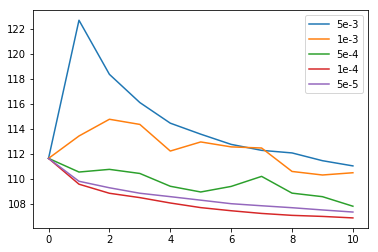

In [3]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

# Fully marginalized

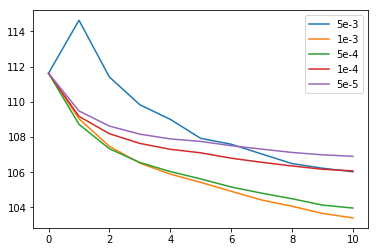

In [4]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_fully_marg_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_fully_marg_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

# Rao-Blackwellized

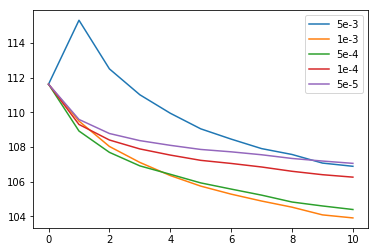

In [5]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_topk1_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_topk1_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

# NVIL

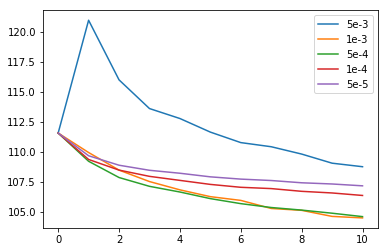

In [6]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_nvil_lr' + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_nvil_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

# Gumbel-softmax

In [7]:
# for Gumbel-softmax, we also consider the annealing rate
annealr_vec = ['1e-5', '5e-5', '1e-4', '5e-4']

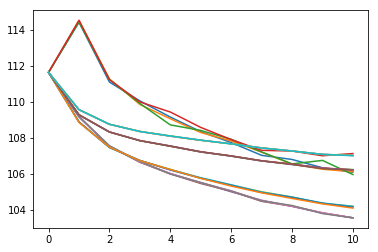

In [8]:
test_loss_array = np.zeros((len(lr_vec), len(annealr_vec)))

i = 0

plt.plot()

for lr in lr_vec:
    j = 0
    for annealr in annealr_vec:
        batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_gumbel_lr' + lr + 
                               '_annealr' + annealr + 
                               '_batch_losses.npy')
        plt.plot(batch_losses, label = lr)
    
        test_loss_array[i, j] = np.load('../mnist_vae_results/tuning_results/ss_vae_gumbel_lr' + lr + 
                                   '_annealr' + annealr + 
                                   '_test_losses.npy')[-1]
        j += 1
    i += 1
    
# plt.legend()

In [9]:
np.unravel_index(test_loss_array.argmin(), test_loss_array.shape)

(1, 3)

In [10]:
(lr_vec[1], annealr_vec[3])

('1e-3', '5e-4')

# REBAR

In [11]:
# for REBAR, there is also a scaling parameter
eta_vec = ['0.2', '0.4', '0.6', '0.8', '1.0']

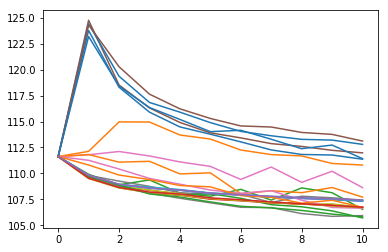

In [12]:
test_loss_array = np.zeros((len(eta_vec), len(lr_vec)))

i = 0

plt.plot()

for eta in eta_vec: 
    j = 0
    for lr in lr_vec:
        batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_rebar_lr' + lr + 
                               '_eta' + eta_vec[i] + '_batch_losses.npy')
        plt.plot(batch_losses, label = lr)

        test_loss_array[i, j] = np.load('../mnist_vae_results/tuning_results/ss_vae_rebar_lr' 
                                        + lr + '_eta' + eta_vec[i] + '_test_losses.npy')[-1]    

        j+=1
    i += 1

    
# plt.legend()

In [13]:
np.unravel_index(test_loss_array.argmin(), test_loss_array.shape)

(4, 2)

In [14]:
test_loss_array

array([[113.03919983, 111.6883316 , 107.61999512, 106.85460663,
        107.32453156],
       [114.10475922, 108.84947205, 110.91385651, 106.90292358,
        107.33006287],
       [115.23886108, 108.2520752 , 106.77172089, 106.76470947,
        107.38422394],
       [115.5765686 , 108.02371979, 106.47678375, 106.82131958,
        107.33118439],
       [114.37494659, 107.8001709 , 106.32988739, 106.76574707,
        107.44458771]])

In [15]:
(eta_vec[4], lr_vec[2])

('1.0', '5e-4')

# RELAX

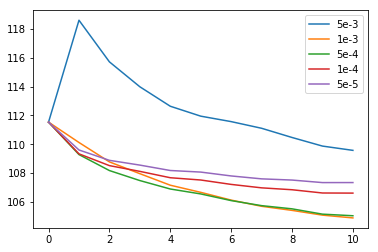

In [16]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_relax_adapt_cv_lr' + 
                           lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_nvil_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()